In [1]:
import zipfile
import pandas as pd
import io

# Path to the ZIP file
zip_file_path = 'data_YourNextPurchase.zip'

# Dictionary to store DataFrames
dataframes = {}

# Open the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # List all files in the ZIP
    file_names = zip_ref.namelist()
    
    # Load CSV files into DataFrames
    for file_name in file_names:
        if file_name.endswith('.csv'):
            with zip_ref.open(file_name) as file:
                # Read the CSV file into a DataFrame
                df_name = file_name.split('/')[-1].split('.')[0]  # Use the file name (without extension) as key
                dataframes[df_name] = pd.read_csv(io.TextIOWrapper(file, encoding='utf-8'))
                
                
# Extract individual dataframes from the dictionary
clients_df = dataframes['clients']
products_df = dataframes['products']
stocks_df = dataframes['stocks']
stores_df = dataframes['stores']
transactions_df = dataframes['transactions']

# Convert date column to datetime format for temporal aggregations
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['SaleTransactionDate'], errors='coerce')


In [2]:
# Print data info for all dataframes
print("Clients DataFrame Info:")
print(clients_df.info())
print("\nProducts DataFrame Info:")
print(products_df.info())
print("\nStocks DataFrame Info:")
print(stocks_df.info())
print("\nStores DataFrame Info:")
print(stores_df.info())
print("\nTransactions DataFrame Info:")
print(transactions_df.info())

Clients DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424037 entries, 0 to 424036
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ClientID          424037 non-null  int64  
 1   ClientSegment     424037 non-null  object 
 2   ClientCountry     424037 non-null  object 
 3   ClientOptINEmail  424037 non-null  int64  
 4   ClientOptINPhone  424037 non-null  int64  
 5   ClientGender      363242 non-null  object 
 6   Age               119962 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 22.6+ MB
None

Products DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47458 entries, 0 to 47457
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     47458 non-null  int64 
 1   Category      47458 non-null  object
 2   FamilyLevel1  47458 non-null  object
 3   FamilyLevel2  474

In [3]:
print("Clients DataFrame:")
display(clients_df.head())
print("\nProducts DataFrame:")
display(products_df.head())
print("\nStocks DataFrame:")
display(stocks_df.head())
print("\nStores DataFrame:")
display(stores_df.head())
print("\nTransactions DataFrame:")
display(transactions_df.head())

Clients DataFrame:


,ClientID,ClientSegment,ClientCountry,ClientOptINEmail,ClientOptINPhone,ClientGender,Age
0,4508698145640552159,LOYAL,USA,1,1,M,NaN
1,2022746661324934183,INACTIVE_1Y,USA,0,1,F,NaN
2,5794452591674300222,LOYAL,USA,1,1,F,NaN
3,678556389231830160,LOYAL,USA,1,1,M,NaN
4,877301557964624234,LOYAL,USA,1,1,F,NaN



Products DataFrame:


,ProductID,Category,FamilyLevel1,FamilyLevel2,Universe
0,43220326960179274,Football,Ball,Nike Ordem V,Women
1,622915065731236396,Football,Ball,Nike Ordem V,Men
2,2020543468978812774,Football,Shorts,Nike Dri-FIT,Women
3,600002891277549143,Football,Shorts,Nike Dri-FIT,Women
4,6150916997899913693,Football,Shorts,Nike Dri-FIT,Men



Stocks DataFrame:


,StoreCountry,ProductID,Quantity
0,AUS,1284651161701379667,2.0
1,AUS,6076274819885027797,2.0
2,AUS,6019386668821120661,2.0
3,AUS,2122575437123245322,2.0
4,AUS,5901681811213086415,2.0



Stores DataFrame:


,StoreID,StoreCountry
0,7793989562498223120,BRA
1,5301108587679203543,BRA
2,2908896877692945358,BRA
3,2718131790848668199,BRA
4,7819332417840564556,BRA



Transactions DataFrame:


,ClientID,ProductID,SaleTransactionDate,StoreID,Quantity,SalesNetAmountEuro,TransactionDate
0,8119209481417068505,3532473209579560668,2023-06-06 00:00:00+00:00,4821951108133690356,4,56.97,2023-06-06 00:00:00+00:00
1,2497726585282787281,5103640511191568912,2023-09-20 00:00:00+00:00,1450109522794525790,1,5.99,2023-09-20 00:00:00+00:00
2,7673687066317773168,4923931302917549451,2023-12-16 00:00:00+00:00,1821464542701843363,2,16.99,2023-12-16 00:00:00+00:00
3,1873234305263900608,8502620308847538595,2023-01-31 00:00:00+00:00,2686511472610728845,4,140.97,2023-01-31 00:00:00+00:00
4,3913817537779196185,8573693021421318503,2024-01-23 00:00:00+00:00,3600233866627167751,1,10.99,2024-01-23 00:00:00+00:00


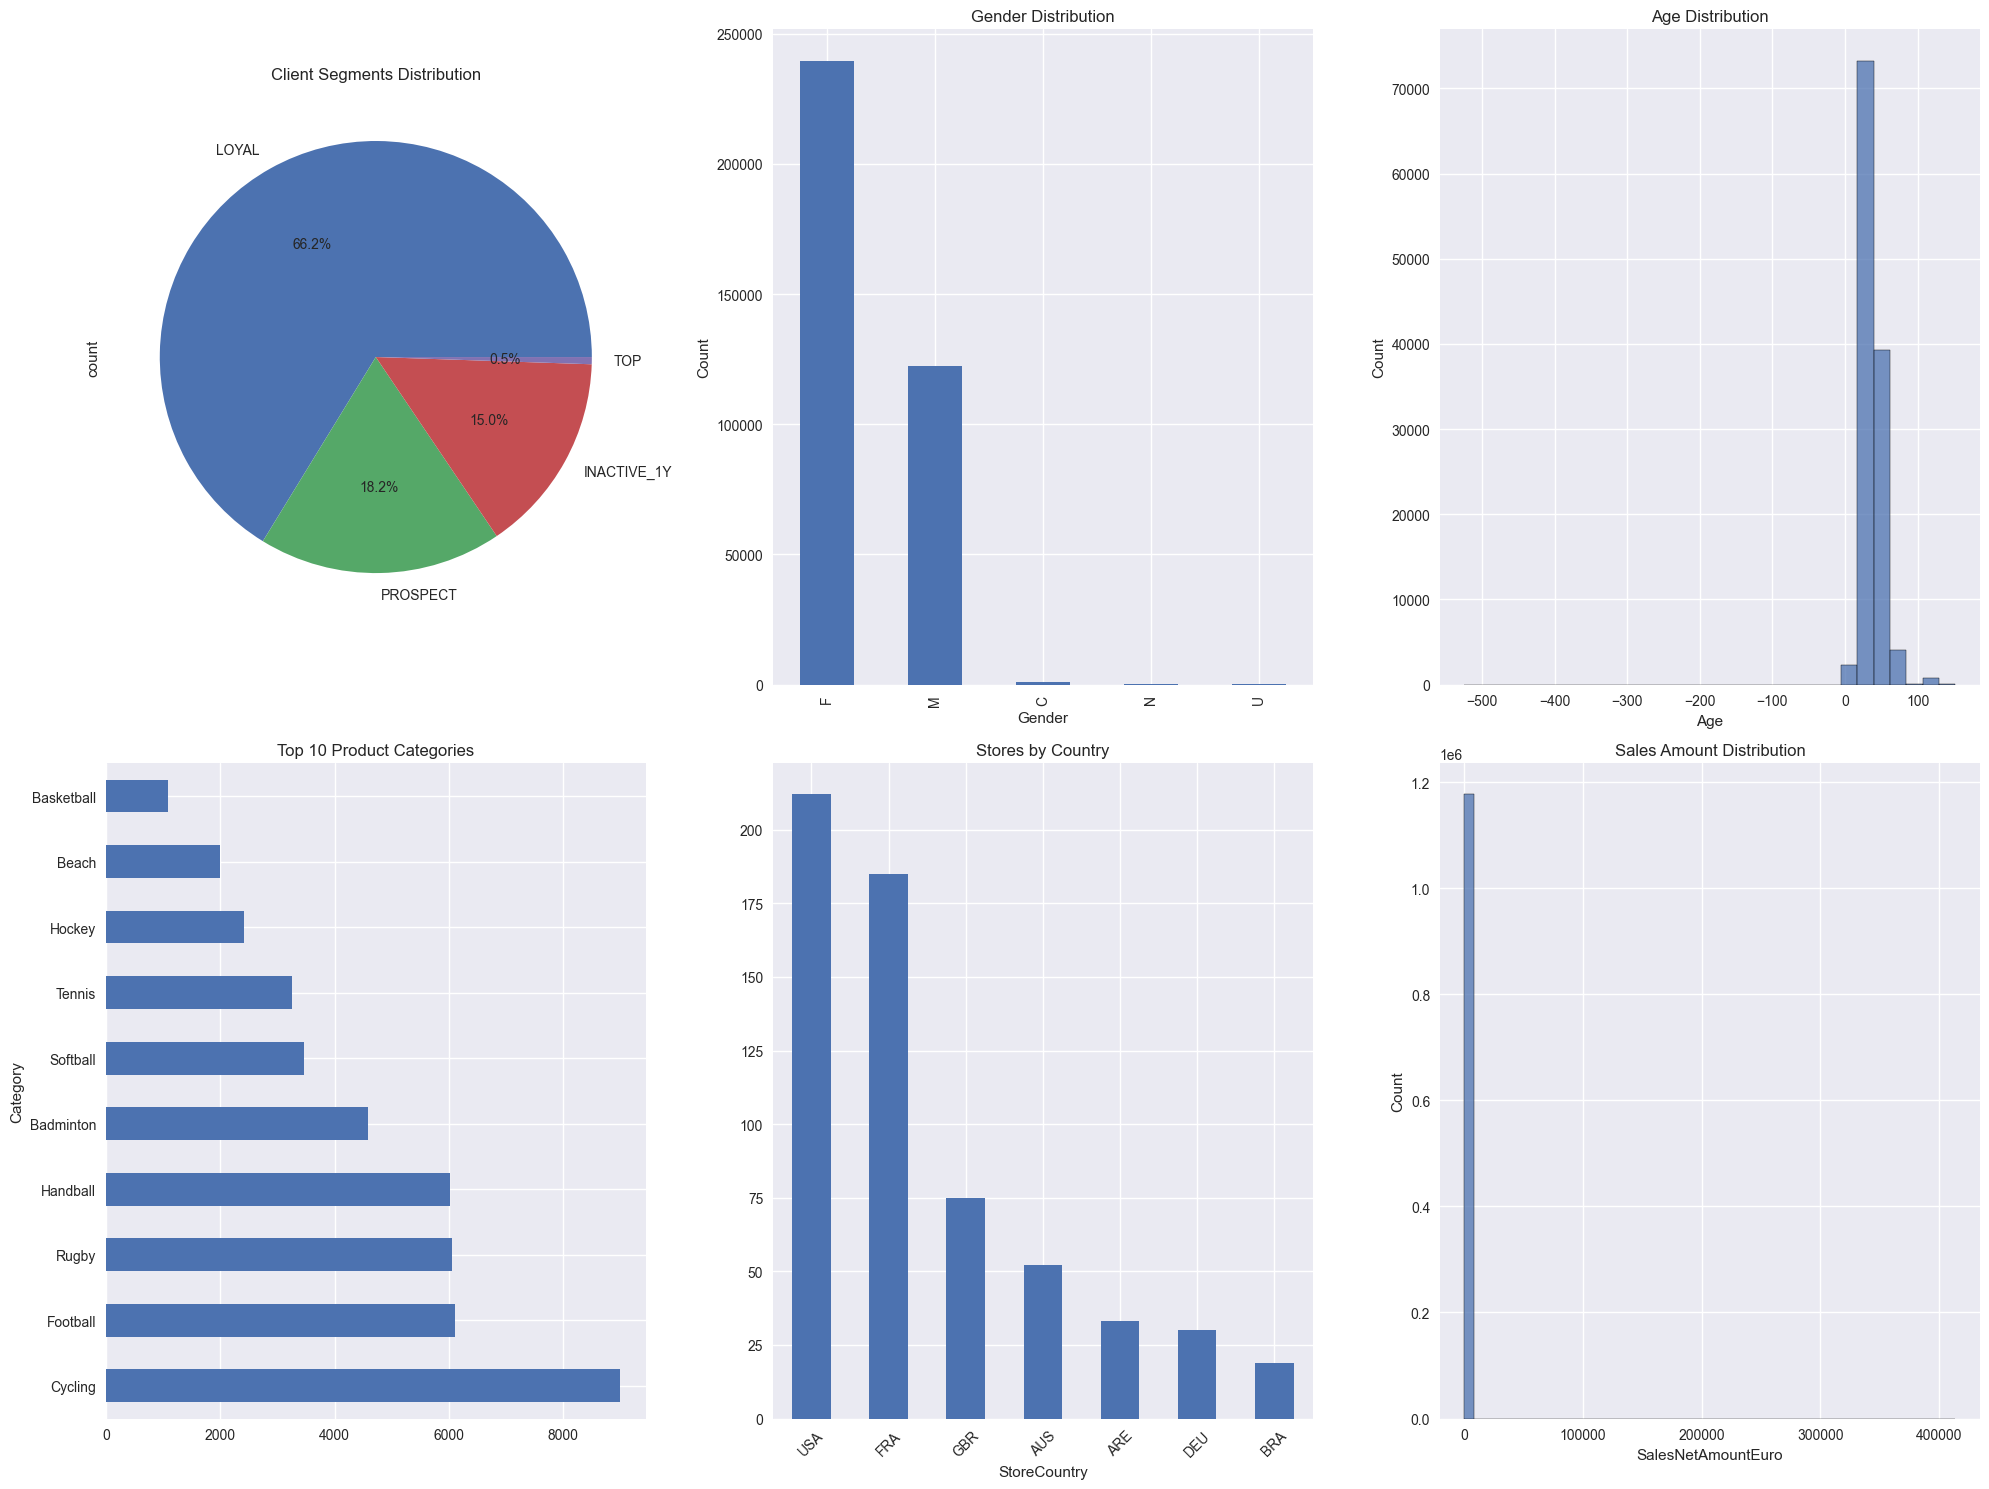

In [4]:
import seaborn as sns
from datetime import datetime

import matplotlib.pyplot as plt

# Create a figure with subplots
plt.style.use('seaborn-v0_8')
fig = plt.figure(figsize=(20, 15))

# 1. Client Segments Distribution
plt.subplot(2, 3, 1)
clients_df['ClientSegment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Client Segments Distribution')

# 2. Gender Distribution
plt.subplot(2, 3, 2)
clients_df['ClientGender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# 3. Age Distribution
plt.subplot(2, 3, 3)
sns.histplot(data=clients_df, x='Age', bins=30)
plt.title('Age Distribution')

# 4. Top 10 Product Categories
plt.subplot(2, 3, 4)
products_df['Category'].value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Product Categories')

# 5. Store Distribution by Country
plt.subplot(2, 3, 5)
stores_df['StoreCountry'].value_counts().plot(kind='bar')
plt.title('Stores by Country')
plt.xticks(rotation=45)

# 6. Sales Amount Distribution
plt.subplot(2, 3, 6)
sns.histplot(data=transactions_df, x='SalesNetAmountEuro', bins=50)
plt.title('Sales Amount Distribution')

plt.tight_layout()
plt.show()

In [5]:
# Get unique values in StoreCountry and their count
unique_countries = stores_df['StoreCountry'].unique()
print("Unique store countries:", unique_countries)
print("\nNumber of unique countries:", len(unique_countries))

Unique store countries: ['BRA' 'FRA' 'DEU' 'AUS' 'GBR' 'ARE' 'USA']

Number of unique countries: 7


In [6]:
sorted_ages = clients_df['Age'].dropna().unique()
sorted_ages.sort()
print(sorted_ages)

[-524. -492. -488.   -8.   -7.   -5.   -2.    0.    1.    2.    3.    4.
    5.    6.    7.    8.    9.   10.   11.   12.   13.   14.   15.   16.
   17.   18.   19.   20.   21.   22.   23.   24.   25.   26.   27.   28.
   29.   30.   31.   32.   33.   34.   35.   36.   37.   38.   39.   40.
   41.   42.   43.   44.   45.   46.   47.   48.   49.   50.   51.   52.
   53.   54.   55.   56.   57.   58.   59.   60.   61.   62.   63.   64.
   65.   66.   67.   68.   69.   70.   71.   72.   73.   74.   75.   76.
   77.   78.   79.   80.   81.   82.   83.   84.   85.   86.   87.   88.
   89.   91.   92.   93.   94.   95.   96.  101.  109.  110.  111.  112.
  114.  115.  116.  117.  118.  119.  120.  121.  122.  123.  124.  125.
  126.  129.  134.  137.  140.  144.  149.  150.  152.]


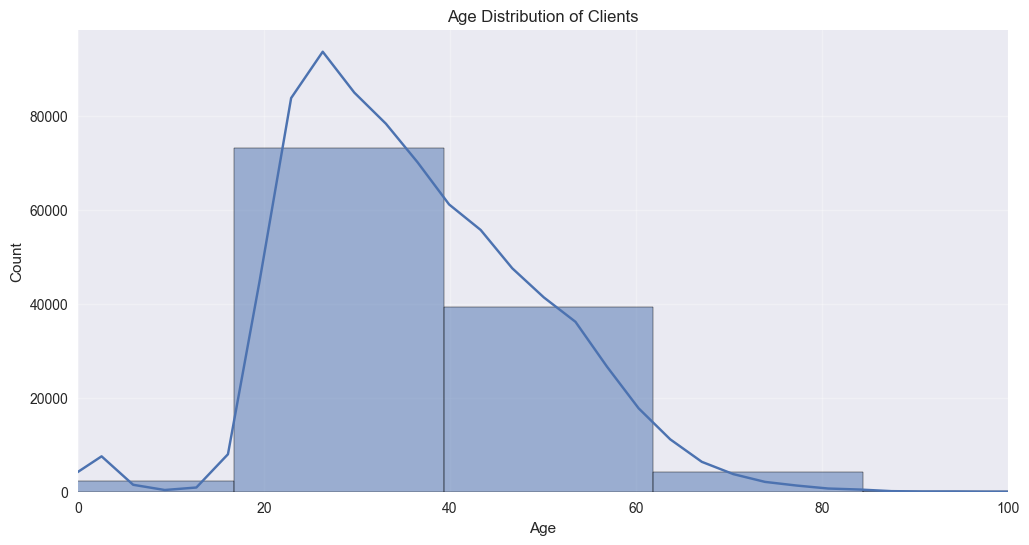

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 6))

# Create a histogram with KDE
sns.histplot(data=clients_df, x='Age', bins=30, kde=True)

# Customize the plot
plt.title('Age Distribution of Clients')
plt.xlabel('Age')
plt.ylabel('Count')

# Remove invalid ages (negative values and unreasonable high values)
plt.xlim(0, 100)

# Add grid for better readability
plt.grid(True, alpha=0.3)

plt.show()

In [ ]:
# Filter out invalid ages
clients_df['Age'] = clients_df['Age'].apply(lambda x: x if (15 <= x <= 85) else None)

# Create a plot to visualize the cleaned age distribution
plt.figure(figsize=(12, 6))

# Create a histogram with KDE for the cleaned data
sns.histplot(data=clients_df, x='Age', bins=30, kde=True)

# Customize the plot
plt.title('Age Distribution of Clients (Ages 15-85)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

plt.show()

In [8]:
# Check missing values in each dataframe as percentages
print("Missing values in clients_df (%):")
print((clients_df.isnull().sum() / len(clients_df) * 100).round(2))
print("\nMissing values in products_df (%):")
print((products_df.isnull().sum() / len(products_df) * 100).round(2))
print("\nMissing values in stocks_df (%):")
print((stocks_df.isnull().sum() / len(stocks_df) * 100).round(2))
print("\nMissing values in stores_df (%):")
print((stores_df.isnull().sum() / len(stores_df) * 100).round(2))
print("\nMissing values in transactions_df (%):")
print((transactions_df.isnull().sum() / len(transactions_df) * 100).round(2))

Missing values in clients_df (%):
ClientID             0.00
ClientSegment        0.00
ClientCountry        0.00
ClientOptINEmail     0.00
ClientOptINPhone     0.00
ClientGender        14.34
Age                 71.71
dtype: float64

Missing values in products_df (%):
ProductID       0.0
Category        0.0
FamilyLevel1    0.0
FamilyLevel2    0.0
Universe        0.0
dtype: float64

Missing values in stocks_df (%):
StoreCountry    0.0
ProductID       0.0
Quantity        0.0
dtype: float64

Missing values in stores_df (%):
StoreID         0.0
StoreCountry    0.0
dtype: float64

Missing values in transactions_df (%):
ClientID               0.0
ProductID              0.0
SaleTransactionDate    0.0
StoreID                0.0
Quantity               0.0
SalesNetAmountEuro     0.0
TransactionDate        0.0
dtype: float64


In [9]:
# Check duplicates in each dataframe
print("Duplicate rows in clients_df:")
print(clients_df.duplicated().sum())
print("\nDuplicate rows in products_df:")
print(products_df.duplicated().sum())
print("\nDuplicate rows in stocks_df:") 
print(stocks_df.duplicated().sum())
print("\nDuplicate rows in stores_df:")
print(stores_df.duplicated().sum())
print("\nDuplicate rows in transactions_df:")
print(transactions_df.duplicated().sum())

# Show example of duplicates if any exists
for name, df in {'clients': clients_df, 'products': products_df, 
                 'stocks': stocks_df, 'stores': stores_df,
                 'transactions': transactions_df}.items():
    dupes = df[df.duplicated()]
    if len(dupes) > 0:
        print(f"\nFirst few duplicates in {name}:")
        display(dupes.head())

Duplicate rows in clients_df:
0

Duplicate rows in products_df:
0

Duplicate rows in stocks_df:
0

Duplicate rows in stores_df:
0

Duplicate rows in transactions_df:
5121

First few duplicates in transactions:


,ClientID,ProductID,SaleTransactionDate,StoreID,Quantity,SalesNetAmountEuro,TransactionDate
29463,784139077380372687,9199855114467326563,2024-12-17 00:00:00+00:00,5060113386821017236,1,5.99,2024-12-17 00:00:00+00:00
33085,784139077380372687,3570677365406858878,2023-07-31 00:00:00+00:00,5060113386821017236,2,6.99,2023-07-31 00:00:00+00:00
40639,784139077380372687,6437654160590574503,2024-12-16 00:00:00+00:00,5060113386821017236,1,5.99,2024-12-16 00:00:00+00:00
41468,784139077380372687,600191190789987226,2024-12-18 00:00:00+00:00,5060113386821017236,1,5.99,2024-12-18 00:00:00+00:00
43773,784139077380372687,4141508142946398531,2023-07-31 00:00:00+00:00,5060113386821017236,2,8.99,2023-07-31 00:00:00+00:00


In [10]:
# Check for duplicates and sort them to show together
duplicates = transactions_df[transactions_df.duplicated(keep=False)]
duplicates_sorted = duplicates.sort_values(by=['ClientID', 'ProductID', 'SaleTransactionDate', 'StoreID', 'Quantity', 'SalesNetAmountEuro'])
print("Number of duplicate rows:", len(duplicates_sorted))
display(duplicates_sorted.head(10))

Number of duplicate rows: 8925


,ClientID,ProductID,SaleTransactionDate,StoreID,Quantity,SalesNetAmountEuro,TransactionDate
84969,3084334653716062,7725420332614167614,2024-06-16 00:00:00+00:00,5202366601222773915,1,5.99,2024-06-16 00:00:00+00:00
1041344,3084334653716062,7725420332614167614,2024-06-16 00:00:00+00:00,5202366601222773915,1,5.99,2024-06-16 00:00:00+00:00
243566,50349714364142695,2952349511890351743,2024-06-22 00:00:00+00:00,7606867699310848059,1,5.99,2024-06-22 00:00:00+00:00
1173488,50349714364142695,2952349511890351743,2024-06-22 00:00:00+00:00,7606867699310848059,1,5.99,2024-06-22 00:00:00+00:00
211169,50349714364142695,8632944867149257358,2024-06-20 00:00:00+00:00,7606867699310848059,1,5.99,2024-06-20 00:00:00+00:00
1045728,50349714364142695,8632944867149257358,2024-06-20 00:00:00+00:00,7606867699310848059,1,5.99,2024-06-20 00:00:00+00:00
753403,53104018006861689,3613681608864907517,2024-11-29 00:00:00+00:00,5946653406451604690,2,5.00,2024-11-29 00:00:00+00:00
820077,53104018006861689,3613681608864907517,2024-11-29 00:00:00+00:00,5946653406451604690,2,5.00,2024-11-29 00:00:00+00:00
414092,84612975874599017,4679812812492781009,2024-07-06 00:00:00+00:00,7606867699310848059,1,5.99,2024-07-06 00:00:00+00:00
647734,84612975874599017,4679812812492781009,2024-07-06 00:00:00+00:00,7606867699310848059,1,5.99,2024-07-06 00:00:00+00:00


C:\Users\rikyr\AppData\Local\Temp\ipykernel_41396\990675259.py:20: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sales_by_month = transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M'))['SalesNetAmountEuro'].sum()


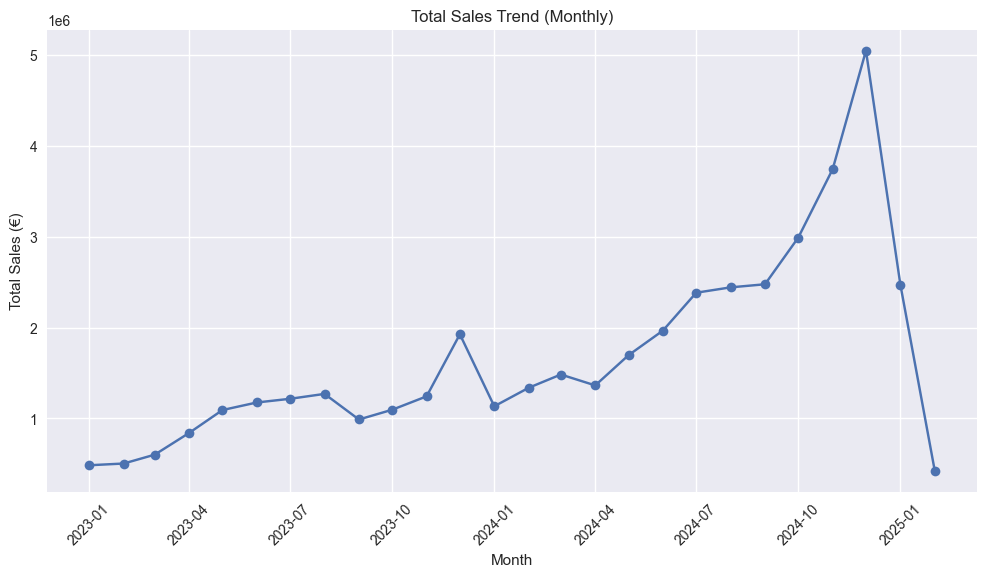

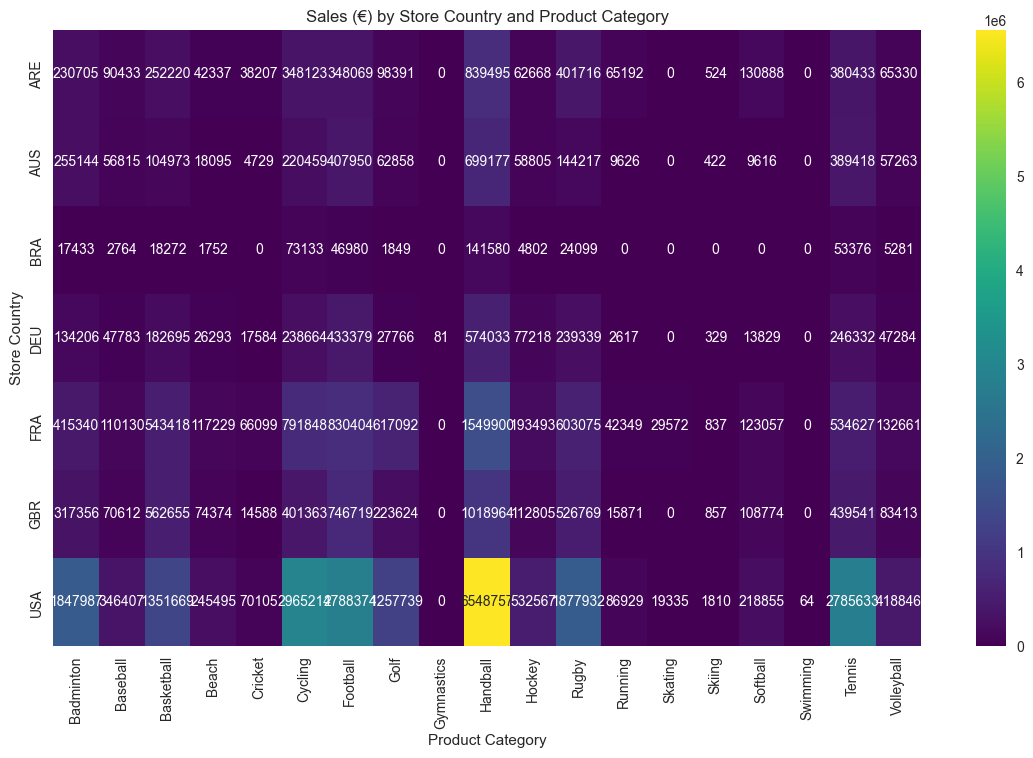

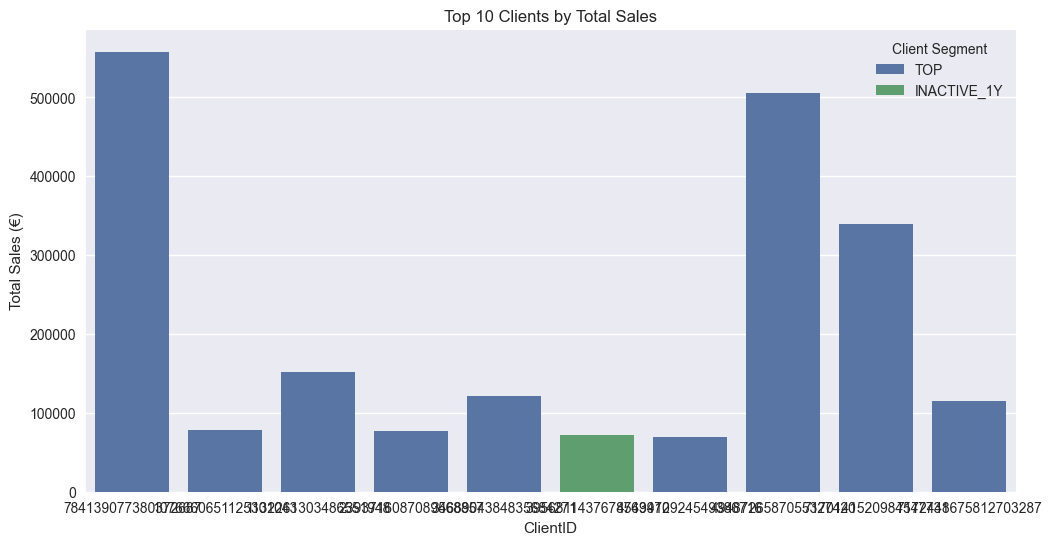

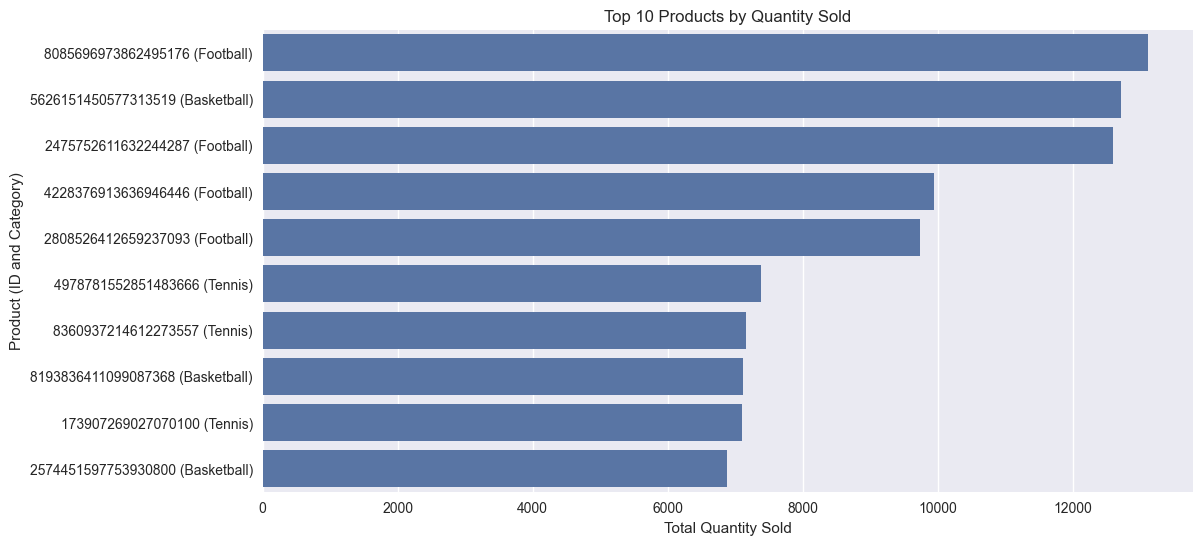

KeyboardInterrupt: 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make sure to use Seaborn style for better graphics
plt.style.use('seaborn-v0_8')

# ===============================
# 1. Data Preparation
# ===============================

# Convert date column to datetime format for temporal aggregations
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['SaleTransactionDate'], errors='coerce')

# ===============================
# 2. Advanced Visualizations
# ===============================

# 2.1. Sales Trend Over Time (Monthly Aggregation)
sales_by_month = transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M'))['SalesNetAmountEuro'].sum()
sales_by_month.index = sales_by_month.index.to_timestamp()  # convert index to timestamp
plt.figure(figsize=(12, 6))
plt.plot(sales_by_month.index, sales_by_month.values, marker='o')
plt.title('Total Sales Trend (Monthly)')
plt.xlabel('Month')
plt.ylabel('Total Sales (€)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# 2.2. Heatmap: Sales by Store Country and Product Category
# Merge transactions with stores and products to get StoreCountry and Category
merged_df = transactions_df.merge(stores_df, on='StoreID', how='left') \
                          .merge(products_df[['ProductID', 'Category']], on='ProductID', how='left')
# Aggregate sales by Country and Category
heatmap_data = merged_df.groupby(['StoreCountry', 'Category'])['SalesNetAmountEuro'].sum().unstack(fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".0f")
plt.title('Sales (€) by Store Country and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Store Country')
plt.show()

# 2.3. Top 10 Clients by Total Sales
client_sales = transactions_df.groupby('ClientID')['SalesNetAmountEuro'].sum().sort_values(ascending=False).head(10)
top_clients = client_sales.reset_index().merge(clients_df[['ClientID', 'ClientSegment']], on='ClientID', how='left')
plt.figure(figsize=(12, 6))
sns.barplot(data=top_clients, x='ClientID', y='SalesNetAmountEuro', hue='ClientSegment')
plt.title('Top 10 Clients by Total Sales')
plt.xlabel('ClientID')
plt.ylabel('Total Sales (€)')
plt.legend(title='Client Segment')
plt.show()

# 2.4. Top 10 Products by Quantity Sold
product_sales = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = product_sales.reset_index().merge(products_df[['ProductID', 'Category']], on='ProductID', how='left')
# Create a label combining ProductID and Category for better interpretation
top_products['Label'] = top_products['ProductID'].astype(str) + ' (' + top_products['Category'] + ')'
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Quantity', y='Label', orient='h')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product (ID and Category)')
plt.show()

# 2.5. Correlation between Quantity and Sales Amount (with sampling)
# To avoid overloading the graph, sample 10,000 random rows
sample_df = transactions_df.sample(n=10000, random_state=42)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_df, x='Quantity', y='SalesNetAmountEuro', alpha=0.3)
sns.regplot(data=sample_df, x='Quantity', y='SalesNetAmountEuro', scatter=False, color='red')
plt.title('Correlation between Quantity and Sales Amount (Sampled)')
plt.xlabel('Quantity Sold')
plt.ylabel('Sales Amount (€)')
plt.show()

# 2.6. Distribution of Transactions per Client
transactions_per_client = transactions_df.groupby('ClientID').size()
plt.figure(figsize=(10, 6))
sns.histplot(transactions_per_client, bins=50, kde=True)
plt.title('Distribution of Transactions per Client')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

# 2.7. Total Sales by Day of Week
transactions_df['Weekday'] = transactions_df['TransactionDate'].dt.day_name()
sales_by_weekday = transactions_df.groupby('Weekday')['SalesNetAmountEuro'].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_weekday = sales_by_weekday.reindex(weekday_order)
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_weekday.index, y=sales_by_weekday.values)
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales (€)')
plt.show()

# 2.8. Average Sales by Client Age Group
client_transactions = transactions_df.merge(clients_df[['ClientID', 'Age']], on='ClientID', how='left')
client_transactions_age = client_transactions.dropna(subset=['Age']).copy()
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
client_transactions_age['AgeGroup'] = pd.cut(client_transactions_age['Age'], bins=bins, labels=labels, right=False)
avg_sales_agegroup = client_transactions_age.groupby('AgeGroup')['SalesNetAmountEuro'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sales_agegroup.index, y=avg_sales_agegroup.values)
plt.title('Average Sales Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Amount (€)')
plt.show()

# 2.9. Comparison between Stock Quantity and Sold Quantity by Product
stock_per_product = stocks_df.groupby('ProductID')['Quantity'].sum().reset_index().rename(columns={'Quantity': 'StockQuantity'})
sales_per_product = transactions_df.groupby('ProductID')['Quantity'].sum().reset_index().rename(columns={'Quantity': 'SoldQuantity'})
stock_sales = pd.merge(stock_per_product, sales_per_product, on='ProductID', how='inner')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=stock_sales, x='StockQuantity', y='SoldQuantity', alpha=0.5)
plt.title('Comparison: Stock Quantity vs Sold Quantity by Product')
plt.xlabel('Total Stock Quantity')
plt.ylabel('Total Sold Quantity')
plt.show()
